## Xgboost on dataset with 80-20 split

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:41:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== TRAINING SET ===
Accuracy        : 0.9833
Precision       : 0.8696
Recall          : 0.0889
F1 Score        : 0.1612
False Negatives : 20376

=== TEST SET ===
Accuracy        : 0.9797
Precision       : 0.1725
Recall          : 0.0371
F1 Score        : 0.0611
False Negatives : 5347



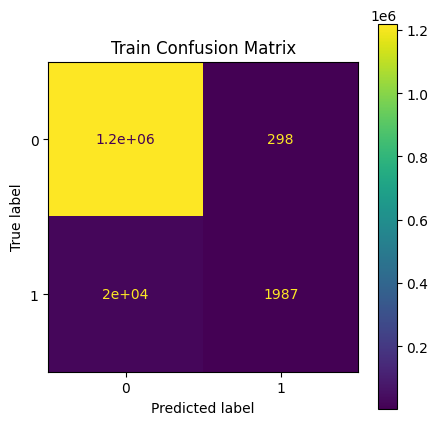

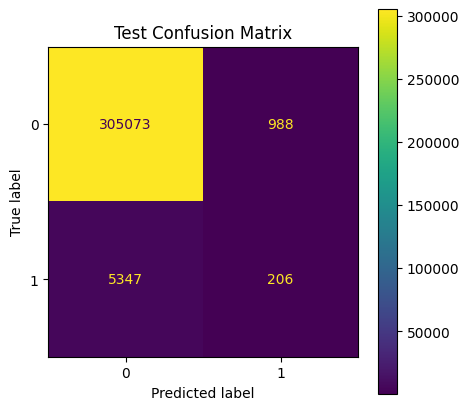

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Load data
train_df = pd.read_csv('/teamspace/studios/this_studio/physionet_train.csv')
test_df  = pd.read_csv('/teamspace/studios/this_studio/physionet_test.csv')

# 2. Prepare features and labels
X_train = train_df.drop(['SepsisLabel', 'PatientID'], axis=1)
y_train = train_df['SepsisLabel']
X_test  = test_df.drop (['SepsisLabel', 'PatientID'], axis=1)
y_test  = test_df['SepsisLabel']

# 3. Train XGBoost directly on raw data
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 4a. Predict & evaluate on TRAIN set
y_pred_train = model.predict(X_train)
acc_train  = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train, zero_division=0)
rec_train  = recall_score(y_train, y_pred_train, zero_division=0)
f1_train   = f1_score(y_train, y_pred_train, zero_division=0)
tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_train, y_pred_train).ravel()

print("=== TRAINING SET ===")
print(f"Accuracy        : {acc_train:.4f}")
print(f"Precision       : {prec_train:.4f}")
print(f"Recall          : {rec_train:.4f}")
print(f"F1 Score        : {f1_train:.4f}")
print(f"False Negatives : {fn_t}\n")

# 4b. Predict & evaluate on TEST set
y_pred_test = model.predict(X_test)
acc_test  = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test, zero_division=0)
rec_test  = recall_score(y_test, y_pred_test, zero_division=0)
f1_test   = f1_score(y_test, y_pred_test, zero_division=0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print("=== TEST SET ===")
print(f"Accuracy        : {acc_test:.4f}")
print(f"Precision       : {prec_test:.4f}")
print(f"Recall          : {rec_test:.4f}")
print(f"F1 Score        : {f1_test:.4f}")
print(f"False Negatives : {fn}\n")

# 5. (Optional) Confusion matrix visuals
for split, y_true, y_pred in [
    ("Train", y_train, y_pred_train),
    ("Test",  y_test,  y_pred_test)
]:
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax=ax)
    plt.title(f"{split} Confusion Matrix")
    plt.show()
